<a href="https://colab.research.google.com/github/Yusra93/Machine-Learning/blob/master/heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description: this program classifies a person as having a cardiovascular disease or not

In [3]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [17]:
#Load the data
from google.colab import files
uploaded = files.upload()


Saving altered.processed.cleveland.data to altered.processed.cleveland.data


In [18]:
#Store the data into variable
df = pd.read_csv('altered.processed.cleveland.data')

#print the 7  first rows
df.head(7)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3


In [19]:
#Check this data for missing values
df.isnull().values.any()

False

In [20]:
#Count the empty values in each column
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

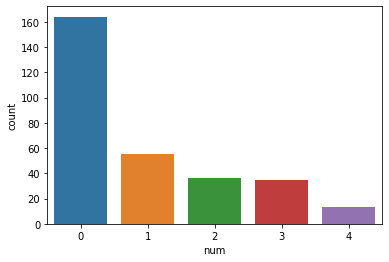

In [22]:
#Visualize the count
sns.countplot(df['num'])

In [ ]:
#view some basic statistic
# df.descripe()

In [23]:
df.shape

(303, 14)

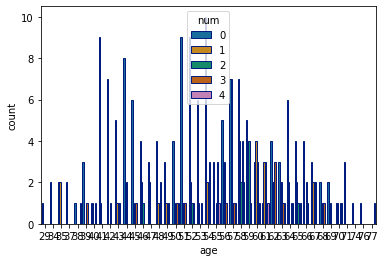

In [24]:
#Look at the number of people whith heart disease that exceeded the number of people without carduvascular disease

# df['age in years'] = (df['age']/365).round(0)
# df['years'] = pd.to_numeric(df['age'], downcast='integer')
df['age'] = pd.to_numeric(df['age'], downcast='integer')

#Visualize the data
sns.countplot(x='age', hue = 'num', data =df, palette='colorblind',  edgecolor= sns.color_palette('dark',1))

In [25]:
#Get the correlation of the columns
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.365323,0.128340,0.222853
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.086048,0.378155,0.224469
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.233117,0.254161,0.407075
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.097528,0.134311,0.157754
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.123726,0.025190,0.070909
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.140764,0.053608,0.059186
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.131749,0.023822,0.183696
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.265699,-0.263384,-0.415040
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145788,0.316134,0.397057
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.301067,0.341416,0.504092


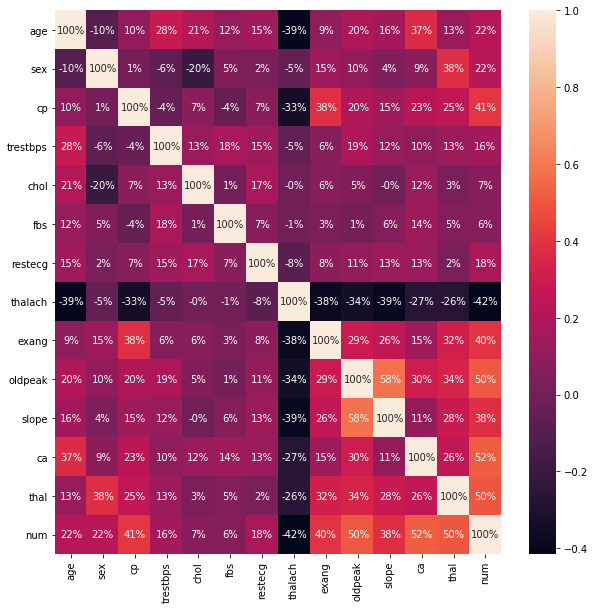

In [26]:
#Visualize the data
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot=True ,fmt='.0%')

In [ ]:
# Remove
#  df = df.drop(['age'],1)
df.hi


In [27]:
#Split the data into feature data and target data set
x= df.iloc[:, :-1].values
y= df.iloc[:, -1].values
# y = np.array(df['num'])

In [28]:
#Split the data into 75% training and 25% testing data sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)


In [29]:
#Feature scaling
#scale the values in the data to be values between 0 and 1
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [31]:
#Use Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, criterion= 'entropy',random_state=1)
forest.fit(x_train, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [32]:
#Test the model accuracy on the training data set
model = forest
model.score(x_train, y_train)

0.9911894273127754

In [42]:
#Test the model accuracy on the test data set
from sklearn.metrics  import confusion_matrix
cm = confusion_matrix(y_test, model.predict(x_test))
TN = cm[0][0]
TP = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]

#Print the confusion matrix
print(cm)

#Print the model accuracy on the test data set
print('Model Test Accuracy ={}'.format((TP + TN)/(TP+TN+FP+FN)))

[[38  3  0  0  0]
 [ 7  2  1  4  0]
 [ 2  4  1  0  0]
 [ 1  6  2  1  1]
 [ 0  0  2  1  0]]
Model Test Accuracy =0.8


In [44]:
y_test

array([0, 0, 0, 4, 1, 0, 0, 2, 2, 3, 0, 0, 1, 2, 0, 0, 0, 0, 0, 3, 0, 3,
       0, 4, 0, 0, 3, 0, 0, 3, 1, 2, 3, 0, 0, 1, 0, 0, 2, 1, 0, 1, 1, 3,
       3, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 1, 0, 1, 1, 3, 1, 0, 2,
       0, 0, 3, 3, 0, 0, 0, 1, 4, 0])

In [45]:
model.predict(x_test)

array([0, 0, 1, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 3,
       0, 2, 0, 0, 2, 0, 0, 4, 3, 1, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 3, 1,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 3, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 2, 0])